In [9]:
%matplotlib notebook

In [207]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# %matplotlib notebook -> for interactive plots
# %matplotlib inline -> static plots

In [2]:
# matplotlib  -> pyplot (procedural method for building viz)
# svg,html -> declarative methods to build viz

In [137]:
# matplotlib architecture
# 3 LAYERS: Backend layer -> Artist layer -> Scripting layer
# Backend layer has 3 abstract interfaces:
#      FigureCanvas -> surface to draw
#      Renderer -> performs the drawing
#      Event -> handle mouse and keyboard events
# Artist layer
# Scripting layer -> enables easy use of matplotlib
#                -> use pyplot interface

In [17]:
mpl.get_backend() #current backend

'nbAgg'

### Simple plot

In [139]:
# A simple plot
plt.plot(1,2, '.')

<IPython.core.display.Javascript object>


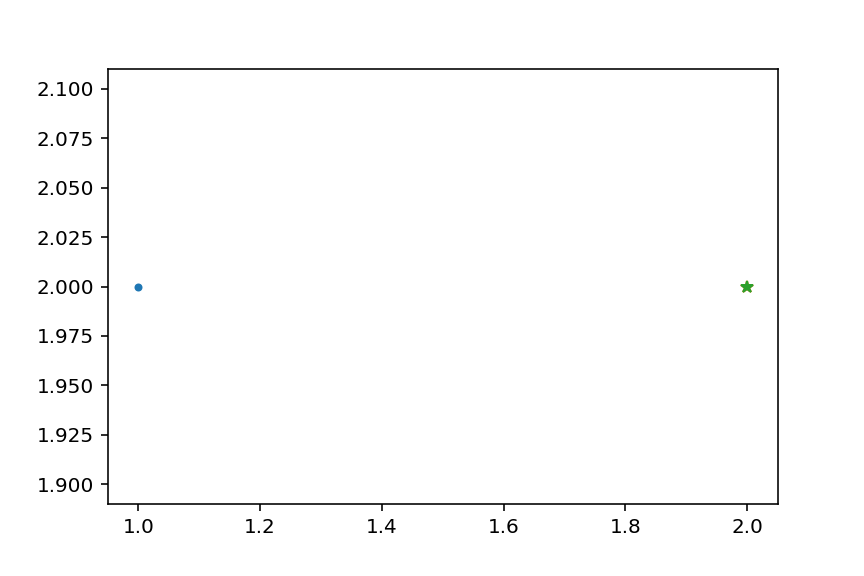

In [52]:
plt.gcf() #returns reference to current figure

In [39]:
plt.gca() #returns current Axes instance

In [140]:
# The same as above, without using plt (pyplot)
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
fig=Figure()
canvas=FigureCanvasAgg(fig) #canvas to render figure(fig) into
ax=fig.add_subplot(111) #returs Axes object
ax.plot(1,2,'.')
canvas.print_jpeg("12plot.jpeg")

In [31]:
#print methods of canvas obejct
[x for x in dir(canvas) if "print" in x]

['print_figure',
 'print_jpeg',
 'print_jpg',
 'print_png',
 'print_raw',
 'print_rgba',
 'print_tif',
 'print_tiff',
 'print_to_buffer']

In [34]:
%%html
<img src="12plot.jpeg"/>

In [142]:
# Modifying the existing figure from plt by adding point to axes instance of plt
fg=plt.gcf()
a=plt.gca()
a.plot(2,2,'*')
cvs=FigureCanvasAgg(fg)
cvs.print_jpeg("2plots.jpeg")
plt.show() #updates the interactive figure above

In [143]:
%%html
<img src="2plots.jpeg"/>

<IPython.core.display.Javascript object>


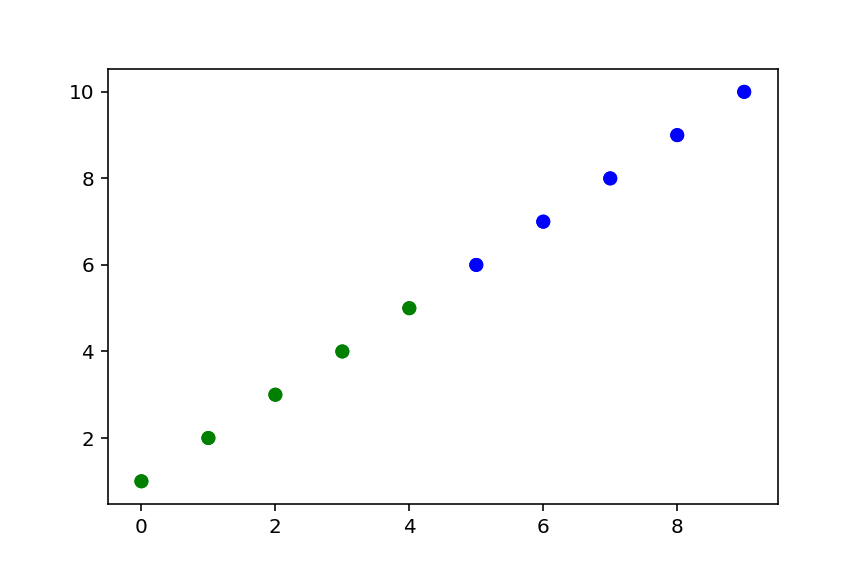

<IPython.core.display.Javascript object>


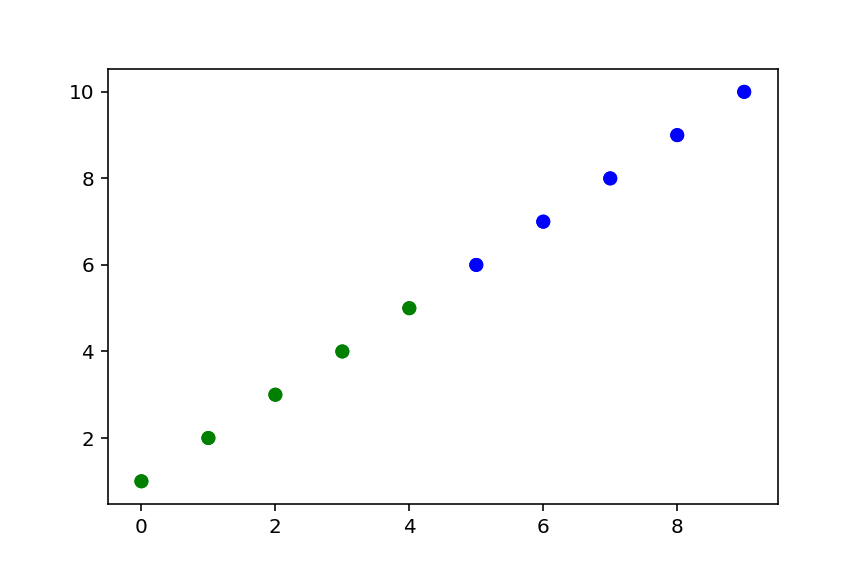

In [92]:
plt.figure() #create a new figure
# 2 figures are shown because it also returns the figure created

<IPython.core.display.Javascript object>


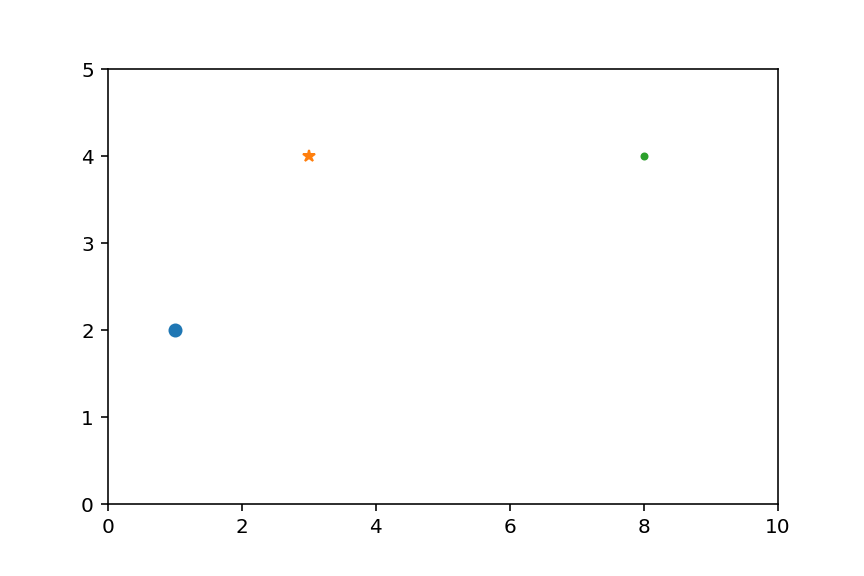

[0, 10, 0, 5]

In [145]:
# Create multiple plots using plt.plot or plt.gca().plot methods
plt.figure()
plt.plot(1,2,'o') #plt creates a patch for this and adds it to the Axes instance 'instance plt.gca()'
plt.plot(3, 4, '*')
ax=plt.gca()
ax.plot(8,4,'.') #directly add using ax.plot
ax.axis([0,10,0,5]) #axis([x_min, x_max, y_min, y_max])

In [146]:
axs=plt.gca()
axs.get_children() #returns children artists

### Scatter Plot

<IPython.core.display.Javascript object>


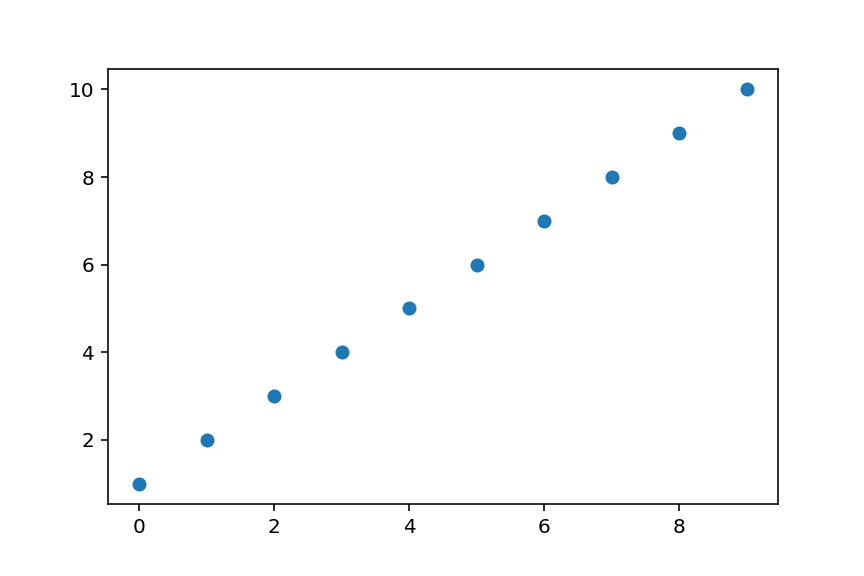

In [147]:
# Basic Scatter plot using plt
fg=plt.figure()
x=np.arange(10)
y=x+1
plt.scatter(x,y)

<IPython.core.display.Javascript object>


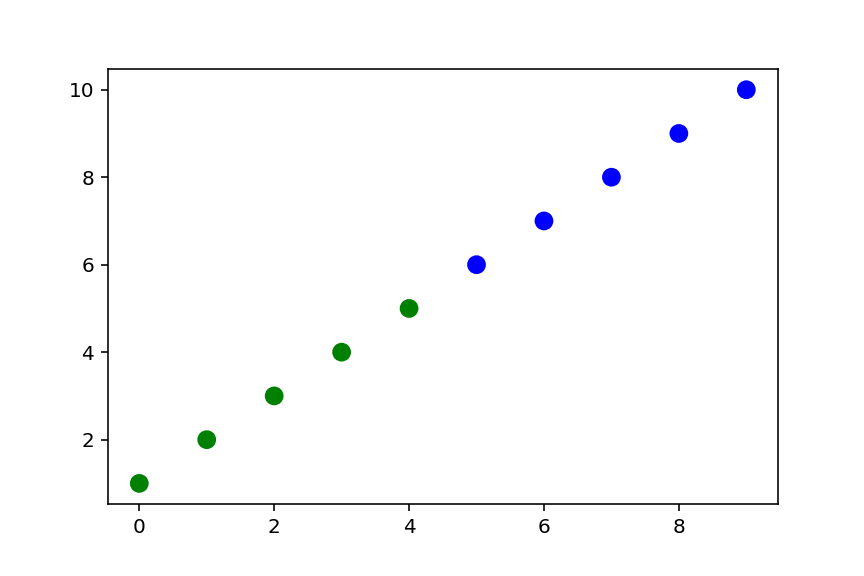

In [150]:
# Scatter plot, with different colors and adjusted data point size
fg2=plt.figure() #if not, the previous plot is updated if using %matplotlib notebook
c=["green"]*5+["blue"]*5
plt.scatter(x,y,s=70, c=c) #s=size of datapoints, c=colors

<IPython.core.display.Javascript object>


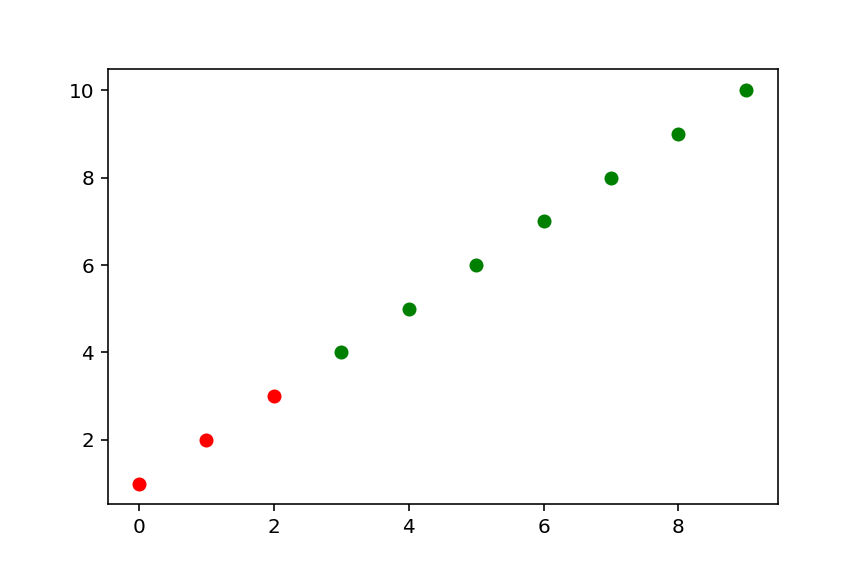

In [156]:
plt.figure()
plt.scatter(x[:3], y[:3],c="red", label="triples") #label is provided, which is useful to create a legend
plt.scatter(x[3:], y[3:], c="green", label="rest")

<IPython.core.display.Javascript object>


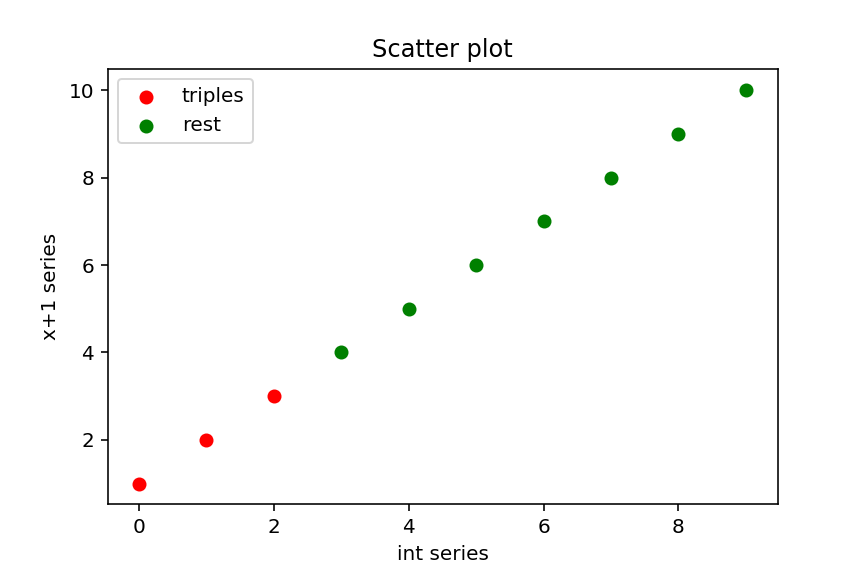

In [151]:
# A complete scatter plot, with labels, title and legend
plt.figure()
plt.scatter(x[:3], y[:3],c="red", label="triples") #label is provided, which is useful to create a legend
plt.scatter(x[3:], y[3:], c="green", label="rest")
plt.xlabel("int series")
plt.ylabel( "x+1 series")
plt.title("Scatter plot")
plt.legend() #loc={1,2,3,4} position in four quadrants, title="Legend"

### Line plot

<IPython.core.display.Javascript object>


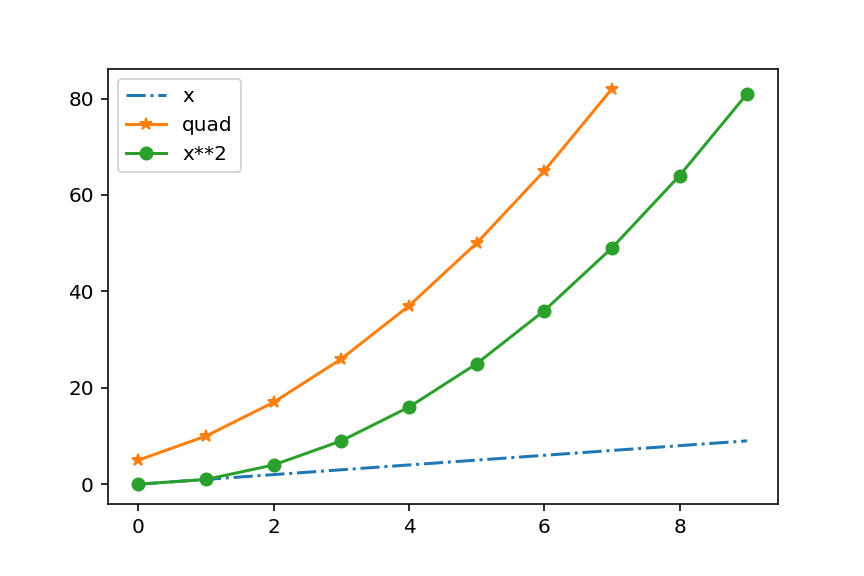

In [179]:
x=np.arange(10) # 10 points
x2=x[:-2]**2+4*x[:-2]+5 #8 points
plt.plot(x,'-.',x2,'-*',x**2, '-o') #'-' for only line, '-o' for line, with 'o' for points
plt.legend(["x", "quad", "x**2"]) #only y values are specified, x values are infered as index of arrays

#### fill_region

<IPython.core.display.Javascript object>


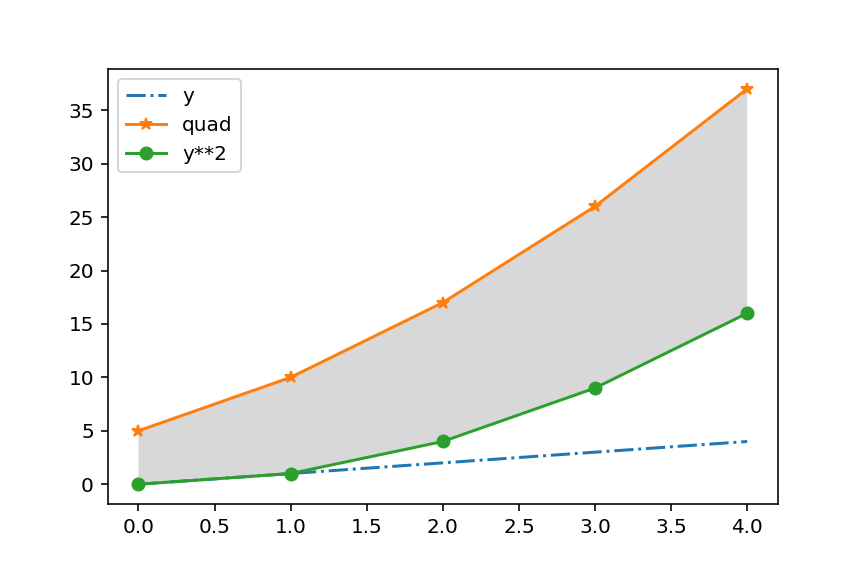

In [205]:
# fill region between two plots
plt.figure()
y=np.arange(5) # 5 points
y2=y**2+4*y+5
plt.plot(y,'-.',y2,'-*',y**2, '-o') #'-' for only line, '-o' for line, with 'o' for points
plt.legend(["y", "quad", "y**2"])
ax=plt.gca()
#ax.fill_between(range(len(y2)), y2) #fill region below y2
ax.fill_between(range(len(y)),y**2, y2, facecolor="gray", alpha=0.3) #fill region between y**2 and y2 polts

### plot time on x axis

In [209]:
import datetime

<IPython.core.display.Javascript object>


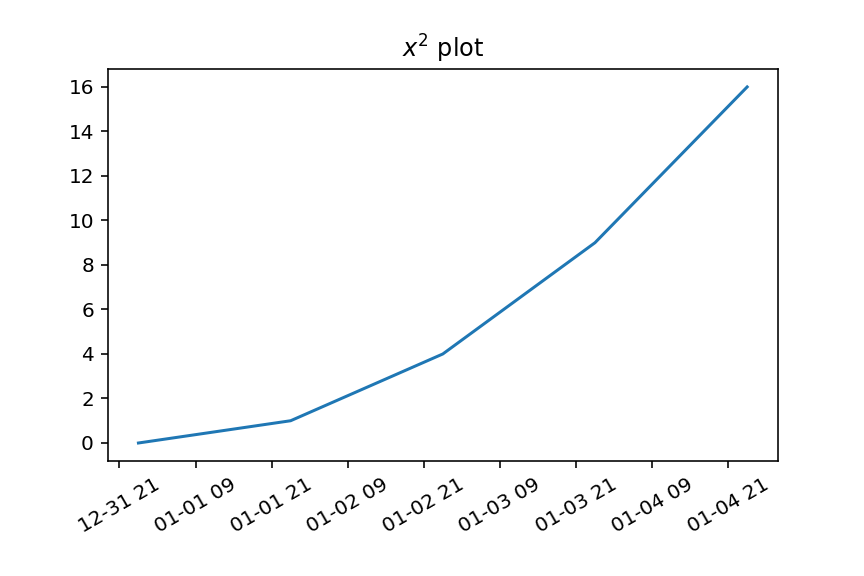

In [241]:
plt.figure()
y=np.arange(5)**2
td=datetime.datetime.today()
days=pd.to_datetime(["2017-01-{}".format(i) for i in range(1,6)]).tolist()
#or
#days=[pd.Timestamp(td)+pd.Timedelta(i,'d') for i in range(5)] #5 consecutive days
plt.plot(days,y)
#cleaning the overlap of xlabels
xax=plt.gca().xaxis
for label in xax.get_ticklabels(): label.set_rotation("30") #better
plt.subplots_adjust(bottom=0.2) #to tune subplot layout, can set for top,left,right too
plt.title("$x^2$ plot") #mpl supports subset of Tex markup 

In [223]:
[x for x in dir(plt) if "subplot" in x]

['subplot', 'subplot2grid', 'subplot_tool', 'subplots', 'subplots_adjust']

## bar plot

<IPython.core.display.Javascript object>


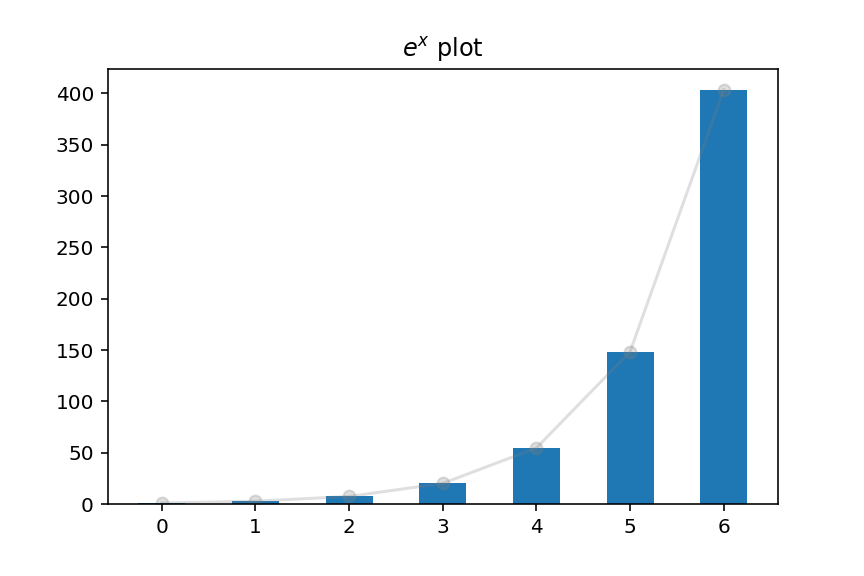

In [270]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.25)
plt.bar(x,y, width=0.5) # plt.bar(x, height, width)
plt.title("$e^x$ plot")

### multiple bar plots

<IPython.core.display.Javascript object>


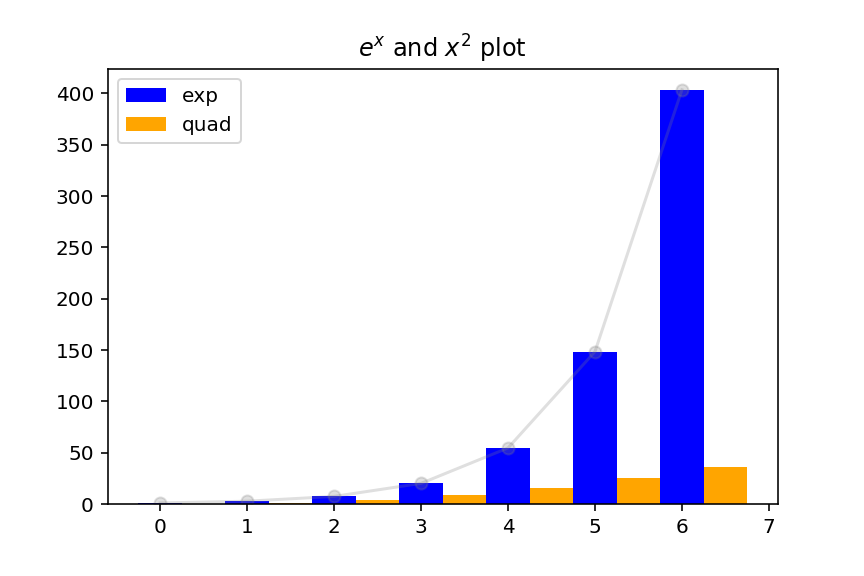

In [289]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.25)
height,width=y,0.5
y2=x**2
plt.bar(x,height, width, color="blue", label="exp") # plt.bar(x, height, width)
#plt.plot(x+width,y2,'-o', c="green", alpha=0.25)
plt.bar(x+width,y2, width, color="orange", label="quad") # x+width is required to prevent overlapping of the two plots
plt.title("$e^x$ and $x^2$ plot")
plt.legend()

<IPython.core.display.Javascript object>


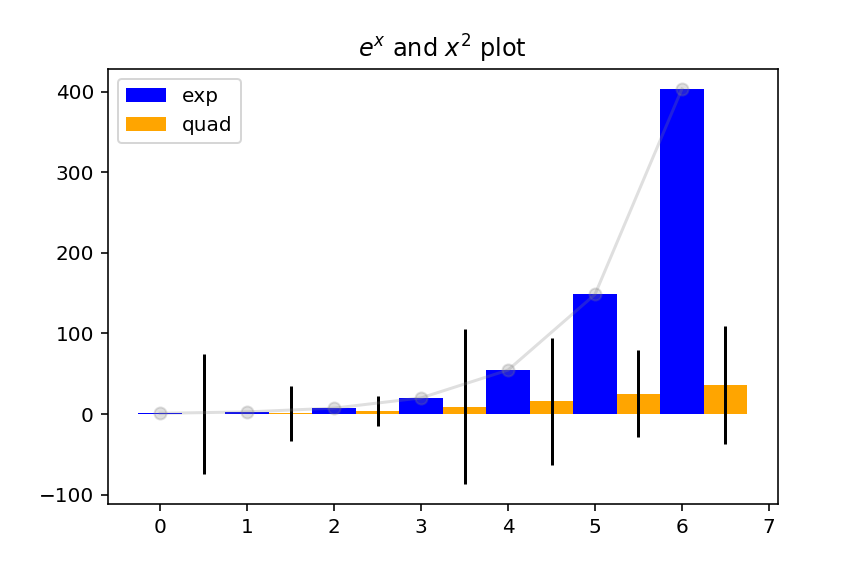

[74, 34, 19, 96, 79, 54, 73]


In [306]:
## some more things with bar charts
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.25)
height,width=y,0.5
y2=x**2
plt.bar(x,height, width, color="blue", label="exp") # plt.bar(x, height, width)
#plt.plot(x+width,y2,'-o', c="green", alpha=0.25)
plt.title("$e^x$ and $x^2$ plot")

# adding yerror values
y_err=[np.random.randint(10,100) for _ in x]
print(y_err)
plt.bar(x+width,y2, width, color="orange", label="quad", yerr=y_err)
# x+width is required to prevent overlapping of the two plots
plt.legend()

### stacked bar plots

<IPython.core.display.Javascript object>


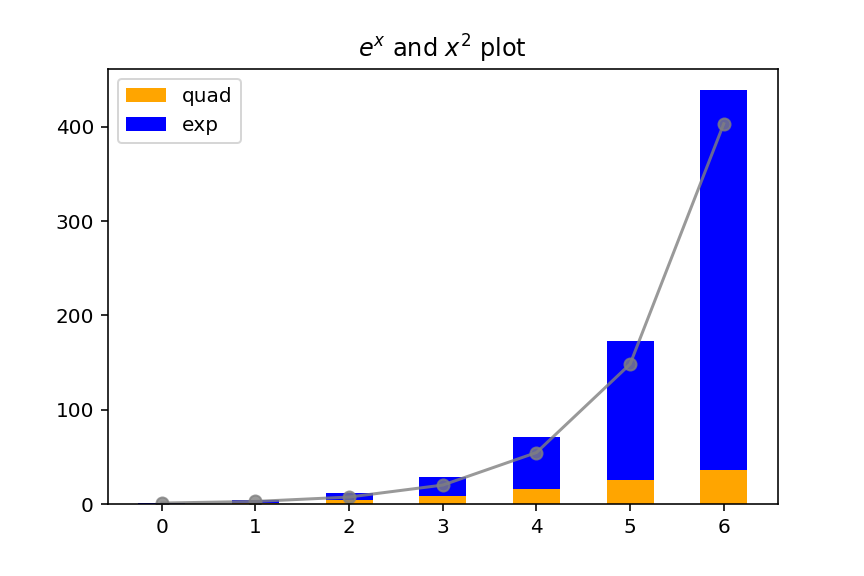

In [313]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.plot(x,y, '-o', c="gray", alpha=0.8)
height,width=y,0.5
y2=x**2
plt.bar(x,y2, width, color="orange", label="quad")
plt.bar(x,height, width, bottom=y2, color="blue", label="exp") # bottom = bottom_stack_values
# the exp bars should be ajusted in length to match the actual height (shown by gray circles)
plt.title("$e^x$ and $x^2$ plot")
plt.legend()

### horizontal bar graphs

<IPython.core.display.Javascript object>


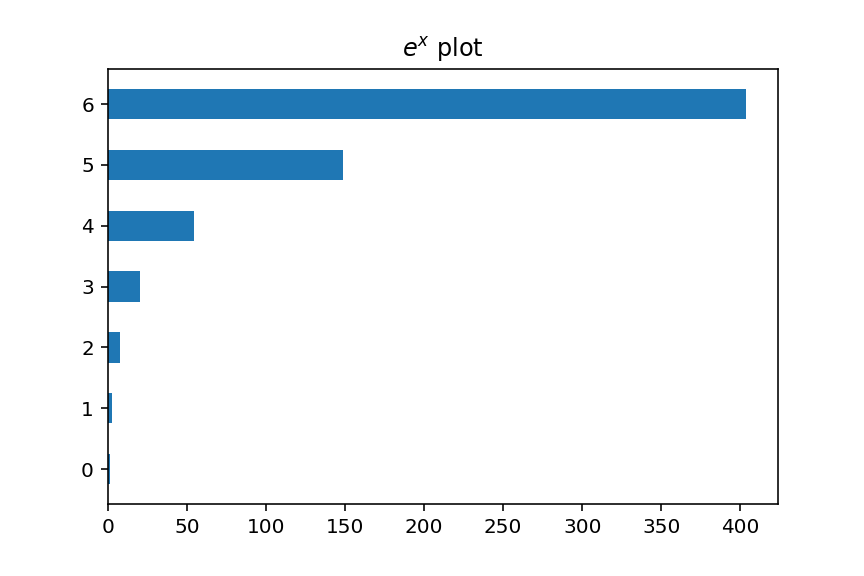

In [319]:
x=np.arange(7)
y=np.exp(x)
plt.figure()
plt.barh(x,y, height=0.5) # plt.barh(x, width, height)
plt.title("$e^x$ plot")

### stacked horizontal bar graphs

<IPython.core.display.Javascript object>


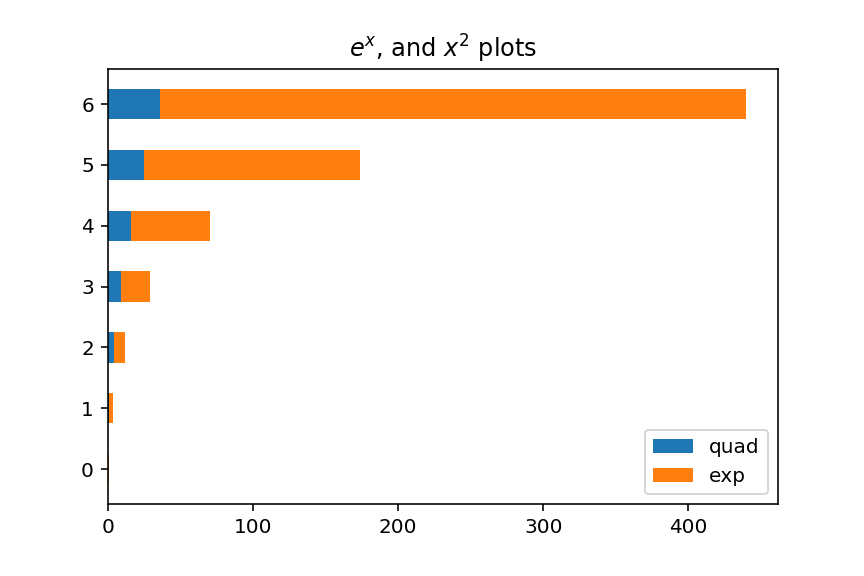

In [327]:
x=np.arange(7)
y=np.exp(x)
y2=x**2
plt.figure()
plt.barh(x,y2,height=0.5, label="quad")
plt.barh(x,y,left=y2,height=0.5, label="exp") # left=values_at_the_bottom
plt.legend(loc=4)
plt.title("$e^x$, and $x^2$ plots")

### control ticks on axes

<IPython.core.display.Javascript object>


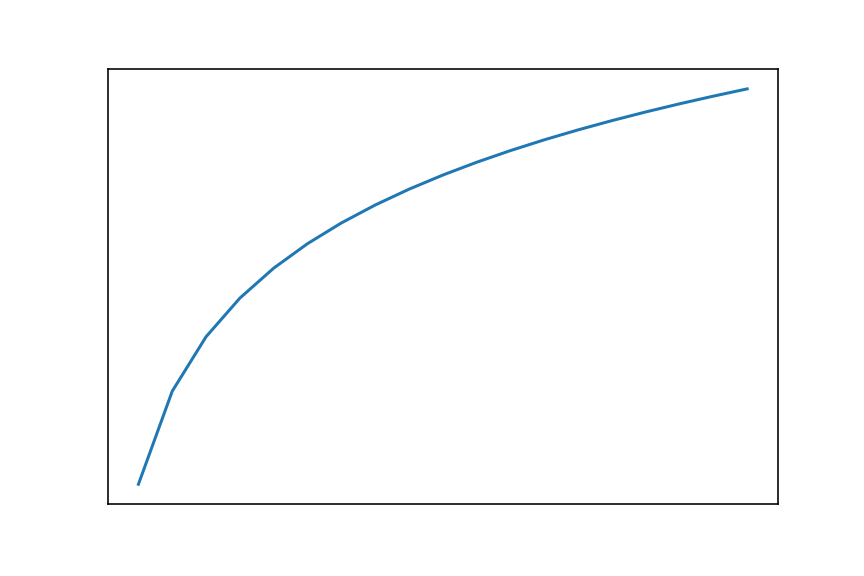

In [341]:
f=plt.figure()
x=np.arange(1,20)
y=np.log(x)
plt.plot(y, label="log")
plt.tick_params(axis="both", # axis={"x","y","both"}
                top="off", bottom="off", left="off", right="off", #{"on","off"} ticks
               labelleft="off", labelbottom="off" # {"on", "off"} labels
               )

### remove the borders (splines)

<IPython.core.display.Javascript object>


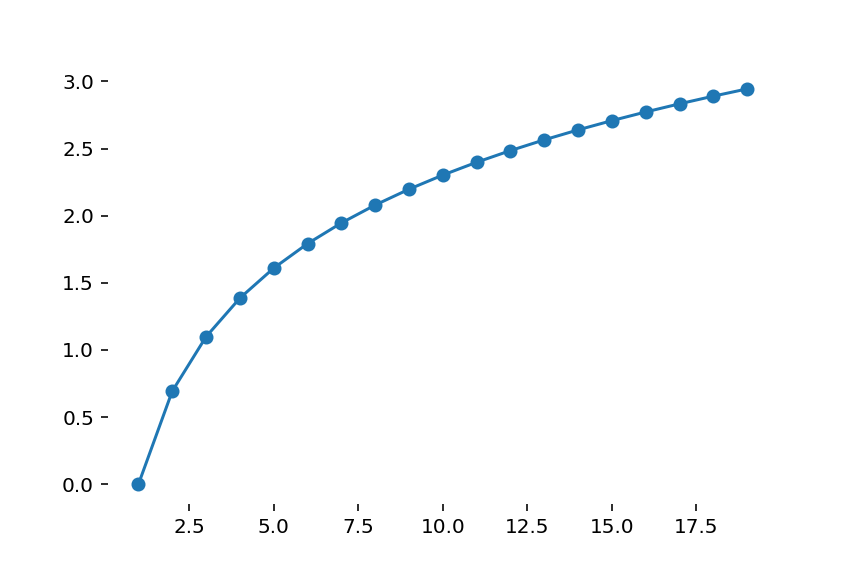

In [404]:
f=plt.figure()
x=np.arange(1,20)
y=np.log(x)
plt.plot(x,y, '-o', label="log")
ax=plt.gca()
for side,spline_obj in ax.spines.items(): #ax.spines is an OrderedDict: {"left","right","bottom","top"} -> mpl.spines.Spine
    spline_obj.set_visible(False)


In [353]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x139dd5668>),
             ('right', <matplotlib.spines.Spine at 0x148109b38>),
             ('bottom', <matplotlib.spines.Spine at 0x147c13c50>),
             ('top', <matplotlib.spines.Spine at 0x147c13860>)])

<IPython.core.display.Javascript object>


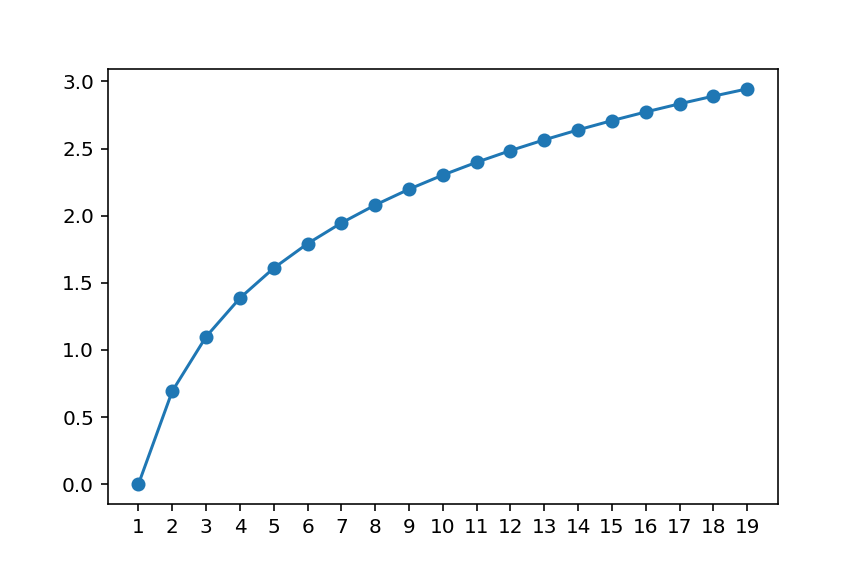

([<matplotlib.axis.XTick at 0x14a919898>,
 <a list of 19 Text xticklabel objects>)

In [408]:
#get/set ticks/labels

f=plt.figure()
x=np.arange(1,20)
y=np.log(x)
plt.plot(x,y, '-o', label="log")
ax=plt.gca()
#loc,ticks=plt.xticks() #gets current loctions,tick values as a list
#plt.xticks(range(5)) #set ticks
plt.xticks(x, x) #set labels for ticks